In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data

df_titanic = pd.read_csv("Titanic_Dataset.csv")
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Let's check the data type of each variable.
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Let's use describe function
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


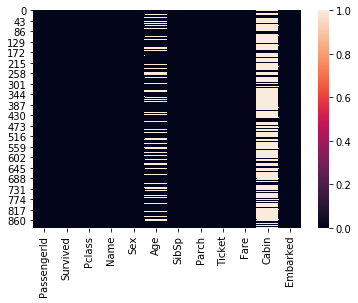

In [6]:
# Let's check the null vaues using heatmap.

sns.heatmap(df_titanic.isnull())
plt.show()
# thus, there are null values present in column "Age" and "Cabin".

In [7]:
# checking the null values without visualization.
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Finding the mean of 'Age'
df_titanic_mean = df_titanic['Age'].mean()
df_titanic_mean

29.69911764705882

In [9]:
# Filling the null values of 'Age'with it's mean.
df_titanic['Age'].replace(np.NaN,df_titanic_mean,inplace=True)

In [10]:
# checking again the null values for 'Age'
df_titanic['Age'].isnull().sum()

0

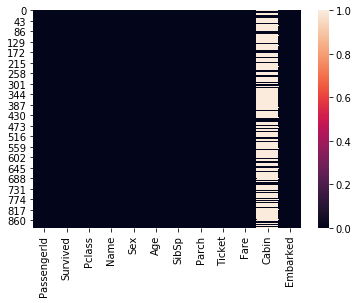

In [11]:
sns.heatmap(df_titanic.isnull())
plt.show()

# now, null values are present only in cabin in high no.

In [12]:
# Let's check the skewness.

df_titanic.skew()

# from below, we observe that
#    1. "Pclass" is negatively skwed.
#    2. "PassengerId", "Survived" and 'Age' have normal distribution.
#    3. 'SibSp', 'Parch' and 'Fare'are positively skewd.

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

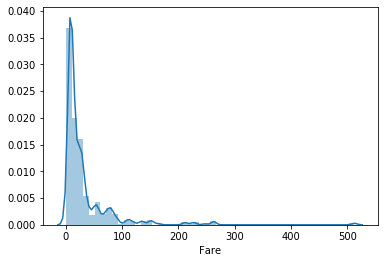

In [13]:
sns.distplot(df_titanic['Fare'])

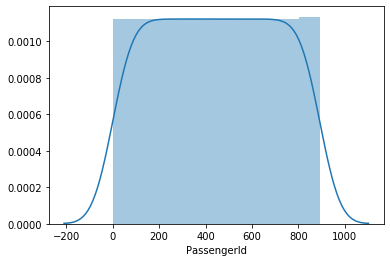

In [14]:
sns.distplot(df_titanic['PassengerId'])

# this normally distributed.

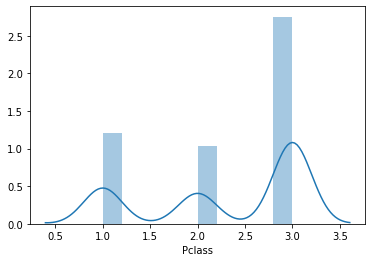

In [15]:
# Plotting the distribution of "Pclass"
sns.distplot(df_titanic.Pclass)

# From the below visualization we can see that the values are numerical (1, 2 and 3) but they are categories.

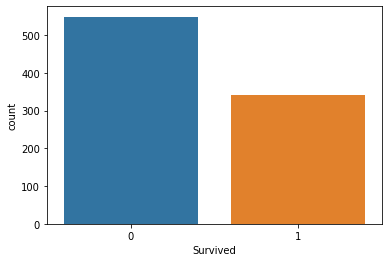

In [16]:
# how many people survived is visualised by the count plot.
sns.countplot(x = "Survived", data = df_titanic)
plt.show()

# from below , it is clearly visible that ]not much people has survived.

In [17]:
# LEt's check tha value counts for 'Survived'.
df_titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

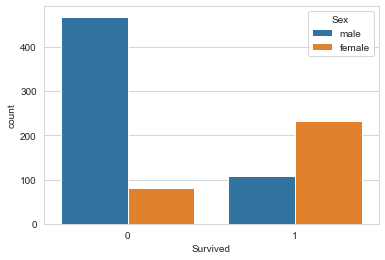

In [19]:
# Let's see the 'Survived' with 'Sex'
sns.set_style('whitegrid')
a = sns.countplot(x="Survived",hue="Sex",data=df_titanic)
plt.show()

# observation from below: the rate of survival of 'women' is more than 'man' and the max. no. of 'man' had not survived.

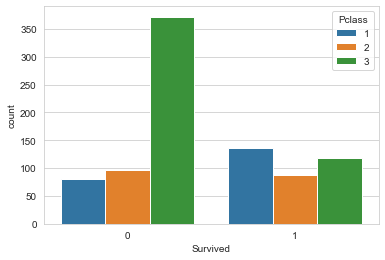

In [20]:
sns.set_style('whitegrid')
a = sns.countplot(x="Survived",hue="Pclass",data=df_titanic)
plt.show()

# passengers having class 3 did not survive as compared to class 1 and 2. 

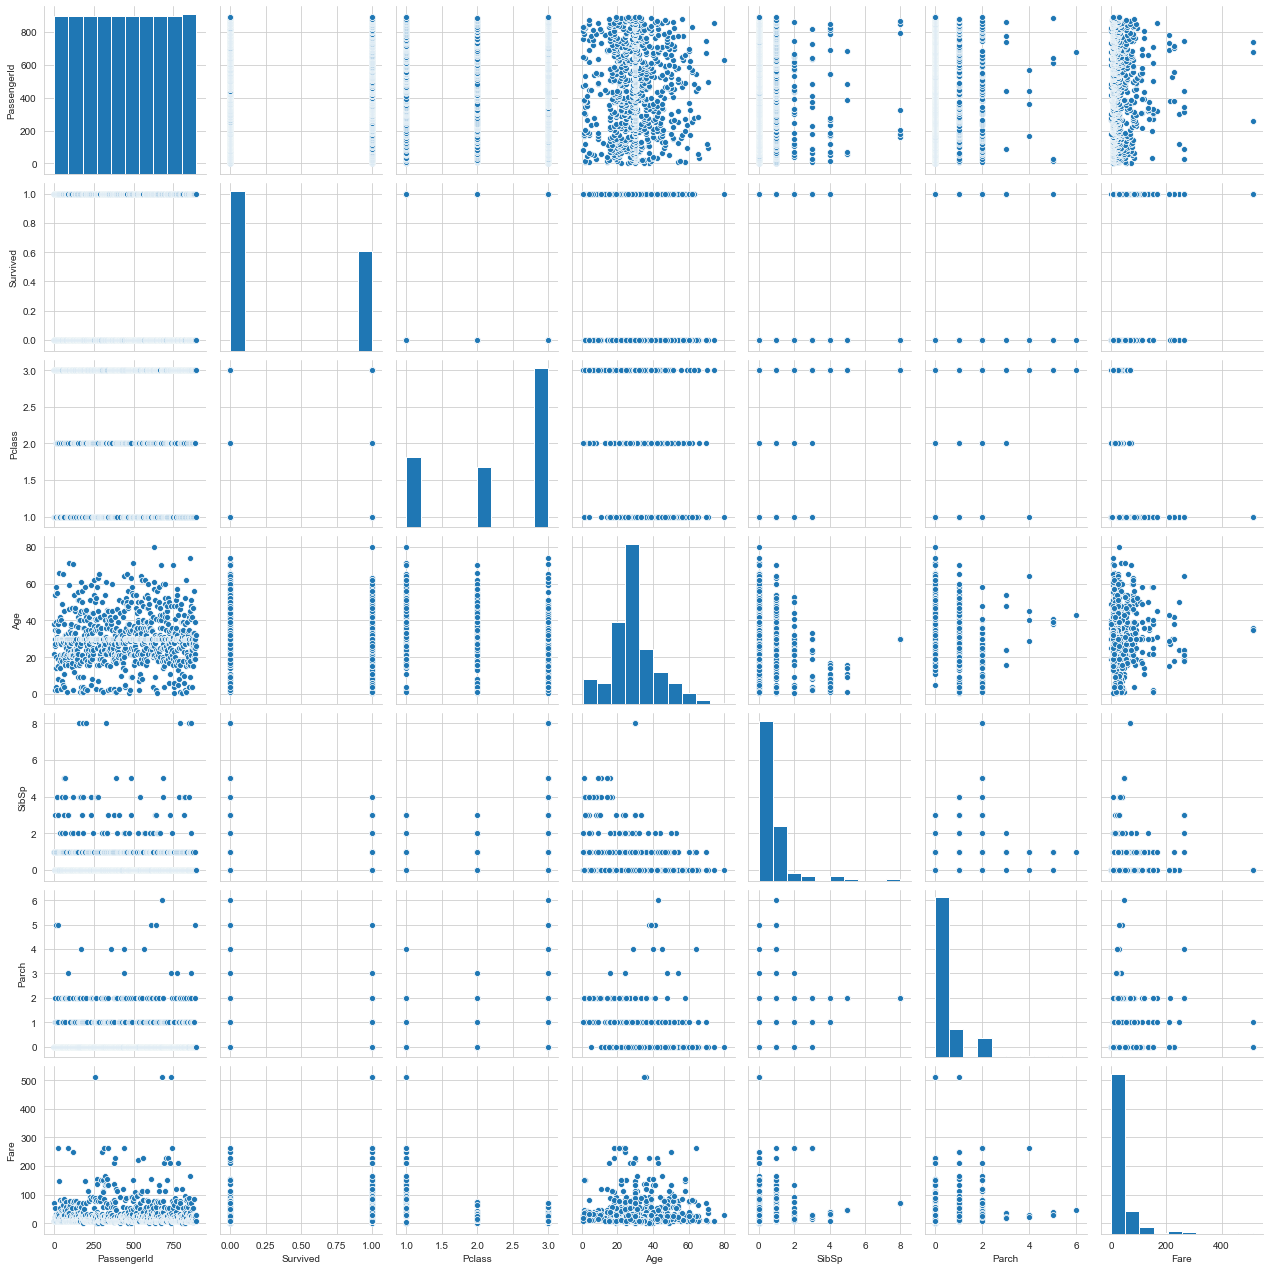

In [21]:
sns.pairplot(df_titanic)

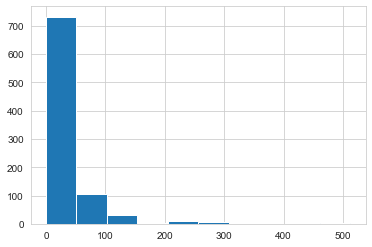

In [22]:
df_titanic['Fare'].hist(bins =10)

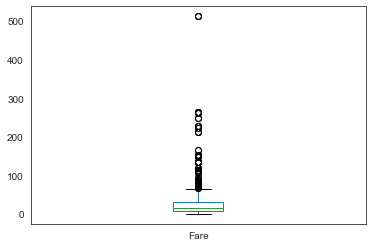

In [23]:
# let's check the outliers through visualisation for particular variables.

sns.set_style('white')
df_titanic['Fare'].plot.box()
# From the below it shows that the outlers are present in this variable.

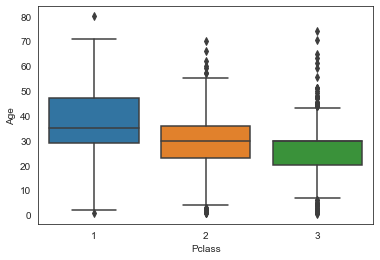

In [24]:
sns.boxplot(x = 'Pclass', y='Age', data = df_titanic)

In [25]:
# Let's drop the 'Cabin' as it contains large no. of null values
df_titanic.drop(['Cabin'], axis = 1, inplace = True)
df_titanic.head()

# we can see that the 'cabin' has been removed from the dataset.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
# Let's convert the categorical variable 'Sex' and 'Embarked'.

sex = pd.get_dummies(df_titanic['Sex'],drop_first=True)
embarked = pd.get_dummies(df_titanic['Embarked'],drop_first=True)

In [27]:
# Let's drop the columns which are not required.
df_titanic.drop(['Sex','Embarked','Name','Ticket'], axis = 1, inplace = True)

In [28]:
df_titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [29]:
# Let's add the dummied 'Sex' and 'Embarked' to the dataset.
df_titanic = pd.concat([df_titanic,sex,embarked], axis = 1)
df_titanic.head()

# the sex and embarked are added as Q and S respectively.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [30]:
# Let's now check the outliers and clean the data.

from scipy.stats import zscore
z = np.abs(zscore(df_titanic))
z

array([[1.73010796, 0.78927234, 0.82737724, ..., 0.73769513, 0.30756234,
        0.61930636],
       [1.72622007, 1.2669898 , 1.56610693, ..., 1.35557354, 0.30756234,
        1.61470971],
       [1.72233219, 1.2669898 , 0.82737724, ..., 1.35557354, 0.30756234,
        0.61930636],
       ...,
       [1.72233219, 0.78927234, 0.82737724, ..., 1.35557354, 0.30756234,
        0.61930636],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.73769513, 0.30756234,
        1.61470971],
       [1.73010796, 0.78927234, 0.82737724, ..., 0.73769513, 3.25137334,
        1.61470971]])

In [31]:
z.shape

(891, 10)

In [32]:
df_titanic_final = df_titanic.loc[(z<3).all(axis=1)]
df_titanic_final.shape

(749, 10)

In [33]:
# by comparing shape of 'z' and 'df_titanic_final' shape , 65 rows have been removed as an outlier.

In [34]:
collist = df_titanic.columns.values  # collist = column list
ncol = 12
nrows = 10

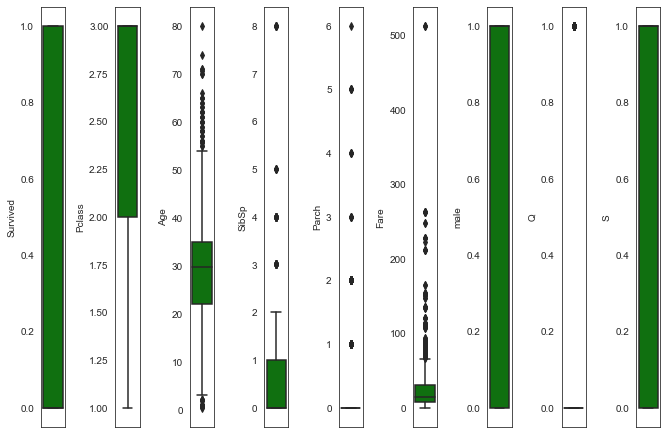

In [35]:
# Visualization of outliers.

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(df_titanic[collist[i]], color= 'green', orient = 'v')
    plt.tight_layout()

In [36]:
#Lets seprate the input and output variable

x = df_titanic.drop(columns=["Survived"])
y = df_titanic[["Survived"]]

In [37]:
# Scaling down using Standardscaler.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.73010796,  0.82737724, -0.5924806 , ...,  0.73769513,
        -0.30756234,  0.61930636],
       [-1.72622007, -1.56610693,  0.63878901, ..., -1.35557354,
        -0.30756234, -1.61470971],
       [-1.72233219,  0.82737724, -0.2846632 , ..., -1.35557354,
        -0.30756234,  0.61930636],
       ...,
       [ 1.72233219,  0.82737724,  0.        , ..., -1.35557354,
        -0.30756234,  0.61930636],
       [ 1.72622007, -1.56610693, -0.2846632 , ...,  0.73769513,
        -0.30756234, -1.61470971],
       [ 1.73010796,  0.82737724,  0.17706291, ...,  0.73769513,
         3.25137334, -1.61470971]])

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

In [39]:
max_r_score=0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = r_state, test_size = 0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test, y_pred)
    print("r2 score corresponding to random state: ", r_state,"is: ", r2_scr)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
        
print("max r2 score corresponding to ",final_r_state," is : ",max_r_score)

r2 score corresponding to random state:  42 is:  0.4383970846097687
r2 score corresponding to random state:  43 is:  0.2222618887919503
r2 score corresponding to random state:  44 is:  0.24793636926288942
r2 score corresponding to random state:  45 is:  0.4444017795504811
r2 score corresponding to random state:  46 is:  0.4730873126568004
r2 score corresponding to random state:  47 is:  0.42724878837569846
r2 score corresponding to random state:  48 is:  0.3648113674633028
r2 score corresponding to random state:  49 is:  0.4427540899100879
r2 score corresponding to random state:  50 is:  0.3726916429790825
r2 score corresponding to random state:  51 is:  0.26927240103993866
r2 score corresponding to random state:  52 is:  0.3692305260004617
r2 score corresponding to random state:  53 is:  0.39388752218657985
r2 score corresponding to random state:  54 is:  0.37387094732297044
r2 score corresponding to random state:  55 is:  0.33136147786754644
r2 score corresponding to random state:  5

In [40]:
# Lets do the cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(), x, y, cv=5, scoring = "r2").mean()

0.3664747331777417

In [41]:
# Thus creating the final model.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = r_state, test_size = 0.20)
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

In [42]:
# Lets evaluate RMSE and r2 score using sklearn library
import numpy as np
print("r2 score is : ",r2_score(y_test, y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score is :  0.27177314840718636
RMSE is :  0.411710082548397


In [43]:
# saving the model using joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(lr, 'lr_titanic.pkl')

['lr_titanic.pkl']